In [77]:
%matplotlib inline

import pandas as pd
import csv
import scipy
from sklearn import svm, preprocessing
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

In [97]:
df = pd.read_csv("train.csv")
df = df[pd.notnull(df['Age'])]
df['Sex'] = df['Sex'].replace('male',1).replace('female',2)
# print(df.head(10))
# df['Sex'].unique()


In [80]:
X = df[['Fare', 'Age']].values
y = df['Survived'].values
X = preprocessing.scale(X)

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
print(clf.predict(np.array([[1,10]])))

[0]


[ 1.03050605 -0.10301903]


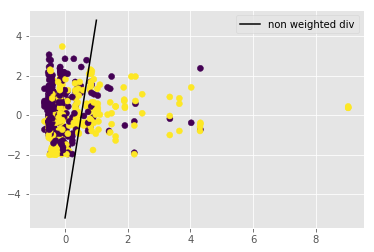

In [83]:
w = clf.coef_[0]
print(w)

a = -w[0] / w[1]
xx = np.linspace(0,1)
yy = a * xx - clf.intercept_[0] / w[1]
h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [108]:
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

def Build_Data_Set():
    data_df = pd.DataFrame.from_csv("train.csv")

    data_df = data_df[pd.notnull(data_df['Age'])]
    data_df['Sex'] = data_df['Sex'].replace('male',1).replace('female',2)
    
    #data_df = data_df[:100]

    X = np.array(data_df[FEATURES].values)#.tolist())

    y = data_df['Survived'].values

    X = preprocessing.scale(X)

    return X,y

def Analysis():

    test_size = 100
    X, y = Build_Data_Set()
    print(len(X))

    
    clf = svm.SVC(kernel="linear", C= 1.0)
    clf.fit(X[:-test_size],y[:-test_size])

    correct_count = 0

    for x in range(1, test_size+1):
        if clf.predict([X[-x]])[0] == y[-x]:
            correct_count += 1

    print("Accuracy:", (correct_count/test_size) * 100.00)

Analysis()

714
[ 0.91123237 -0.75905134  0.15850313 -0.55170307 -0.50589515 -0.50952283]
[-1.47636364 -0.75905134 -0.25482473 -0.55170307 -0.50589515 -0.08877362]
[-1.47636364  1.31743394 -0.73704057 -0.55170307 -0.50589515 -0.08877362]
[-0.28256564 -0.75905134 -0.18593675 -0.55170307 -0.50589515 -0.41024492]
[ 0.91123237  1.31743394  0.64071897 -0.55170307  5.3578895  -0.10531994]
[ 0.91123237 -0.75905134 -0.32371271 -0.55170307 -0.50589515 -0.52275988]
[-0.28256564 -0.75905134 -0.11704878 -0.55170307 -0.50589515 -0.45752012]
[ 0.91123237  1.31743394 -0.53037664 -0.55170307 -0.50589515 -0.45720432]
[ 0.91123237 -0.75905134  0.22739111 -0.55170307 -0.50589515 -0.50676574]
[-0.28256564  1.31743394 -0.32371271 -0.55170307  0.66686178 -0.16441393]
[-1.47636364  1.31743394  1.81181458 -0.55170307  0.66686178  0.91645391]
[ 0.91123237 -0.75905134 -0.73704057 -0.55170307 -0.50589515 -0.50676574]
[ 0.91123237 -0.75905134 -0.6681526  -0.55170307 -0.50589515 -0.46989109]
[ 0.91123237  1.31743394 -1.012592